In [14]:
from IPython.core.display import HTML
css = '<style> h3 {color: white; background-color: black;} h1 {color: white; background-color: darkblue}</style>'
HTML(css)

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

warnings.filterwarnings('ignore')
pd.set_option('max.columns', 100)

# Loading data into dataframes & basic exploration
<a href='http://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3'>Pandas Cheat Sheet for Reference</a>

###  Load all the csv files in the <b>'the-movies-datset'</b> folder as dataframes

In [9]:
! unzip the-movies-dataset.zip

credits = pd.read_csv('the-movies-dataset/credits.csv')
movies_metadata = pd.read_csv('the-movies-dataset/movies_metadata.csv')
ratings = pd.read_csv('the-movies-dataset/ratings_small.csv')

! rm -rf the-movies-dataset

Archive:  the-movies-dataset.zip
   creating: the-movies-dataset/
  inflating: the-movies-dataset/credits.csv  
  inflating: the-movies-dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/the-movies-dataset/
  inflating: __MACOSX/the-movies-dataset/._.DS_Store  
  inflating: the-movies-dataset/movies_metadata.csv  
  inflating: the-movies-dataset/ratings_small.csv  


### Print the shapes of all the loaded dataframes

In [10]:
print("credits: ", credits.shape)
print("movies_metadata: ", movies_metadata.shape)
print("ratings: ", ratings.shape)

credits:  (45476, 2)
movies_metadata:  (45466, 25)
ratings:  (26024289, 4)


### Print the columns names with their corresponding data types for each of the dataframes

In [11]:
print("credits: ", credits.dtypes, end="\n\n", sep="\n")
print("movies_metadata: ", movies_metadata.dtypes, end="\n\n", sep="\n")
print("ratings: ", ratings.dtypes, end="\n\n", sep="\n")

credits: 
id            int64
lead_cast    object
dtype: object

movies_metadata: 
id                             object
imdb_id                        object
adult                          object
budget                         object
original_language              object
original_title                 object
overview                       object
popularity                     object
release_date                   object
revenue                       float64
runtime                       float64
status                         object
tagline                        object
title                          object
vote_average                  float64
vote_count                    float64
genres_all                     object
genres_major                   object
production_companies_major     object
production_companies_all       object
production_countries_major     object
production_countries_all       object
spoken_languages_major         object
spoken_languages_all           object
belon

###  Show the first 7 rows of each of the dataframes

In [12]:
credits.head(7)

,id,lead_cast
0,862,Tom Hanks
1,8844,Robin Williams
2,15602,Walter Matthau
3,31357,Whitney Houston
4,11862,Steve Martin
5,949,Al Pacino
6,11860,Harrison Ford


In [13]:
movies_metadata.head(3)

,id,imdb_id,adult,budget,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genres_all,genres_major,production_companies_major,production_companies_all,production_countries_major,production_countries_all,spoken_languages_major,spoken_languages_all,belongs_to_collection
0,862,tt0114709,False,30000000,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0,Animation; Comedy; Family,Animation,Pixar Animation Studios,Pixar Animation Studios,United States of America,United States of America,English,English,Toy Story Collection
1,8844,tt0113497,False,65000000,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,Adventure; Fantasy; Family,Adventure,TriStar Pictures,TriStar Pictures; Teitler Film; Interscope Com...,United States of America,United States of America,English,English; Français,NaN
2,15602,tt0113228,False,0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Romance; Comedy,Romance,Warner Bros.,Warner Bros.; Lancaster Gate,United States of America,United States of America,English,English,Grumpy Old Men Collection


In [12]:
ratings.head(7)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
5,1,1968,4.0,1425942148
6,1,2762,4.5,1425941300


### List the number of rows with Nulls in each column of all three dataframes

In [13]:
movies_metadata.isnull().sum()

id                                0
imdb_id                          17
adult                             0
budget                            0
original_language                11
original_title                    0
overview                        954
popularity                        5
release_date                     87
revenue                           6
runtime                         263
status                           87
tagline                       25054
title                             6
vote_average                      6
vote_count                        6
genres_all                     2442
genres_major                   2442
production_companies_major    11881
production_companies_all      11881
production_countries_major     6288
production_countries_all       6288
spoken_languages_major         4056
spoken_languages_all           3958
belongs_to_collection         40975
dtype: int64

In [14]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [15]:
credits.isnull().sum()

id              0
lead_cast    8737
dtype: int64

### Check the data types of each of the columns in all the dataframes

In [16]:
movies_metadata.dtypes

id                             object
imdb_id                        object
adult                          object
budget                         object
original_language              object
original_title                 object
overview                       object
popularity                     object
release_date                   object
revenue                       float64
runtime                       float64
status                         object
tagline                        object
title                          object
vote_average                  float64
vote_count                    float64
genres_all                     object
genres_major                   object
production_companies_major     object
production_companies_all       object
production_countries_major     object
production_countries_all       object
spoken_languages_major         object
spoken_languages_all           object
belongs_to_collection          object
dtype: object

In [17]:
credits.dtypes

id            int64
lead_cast    object
dtype: object

In [18]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

# Data Types and Dealing with NULLS

### Convert the numeric columns like popularity, budget etc into float data types from the current string data type format
**Coerce as NA if some invalid value like string is stored in some rows and fill the NAs with 0**

In [19]:
movies_metadata['budget'] = pd.to_numeric(movies_metadata['budget'], 'coerce', 'float').fillna(0)
movies_metadata['popularity'] = pd.to_numeric(movies_metadata['popularity'], 'coerce', 'float').fillna(0)
movies_metadata['id'] = pd.to_numeric(movies_metadata['id'], 'coerce', 'integer').fillna(0).values.astype(np.int64)

### Convert the 'adult' column that currently has True/False stored as Strings to Boolean data types

In [20]:
movies_metadata['adult'] = movies_metadata['adult'].apply(lambda x: True if x == "True" else False)

### The release_date has been loaded as a string data type, convert it to datetime object and store in a new column named release_date_dt <br>
**Use apply and datetime library**

In [21]:
def my_function(datetime_string):
    try:
        date_obj = datetime.strptime(datetime_string, '%Y-%m-%d').date()
    except:
        date_obj = datetime.strptime('1000-01-01', '%Y-%m-%d').date()
    
    return date_obj

movies_metadata['release_date_dt'] = movies_metadata['release_date'].apply(my_function)

### Extract year and month and create two new columns from the release_date_dt column in the movies_metadata dataset.
**Use lambda functions with apply**

In [22]:
movies_metadata['release_date_year'] = movies_metadata['release_date_dt'].apply(lambda x: x.year)
movies_metadata['release_date_month'] = movies_metadata['release_date_dt'].apply(lambda x: x.month)

### Fills NAs/NULLs in all three dataframes with 0 if the column is numeric and empty string '' if the column is a string

In [43]:
dtypes_temp = movies_metadata.isnull().sum()

for col in dtypes_temp.index:
    if dtypes_temp.loc[col] > 0:
        if movies_metadata[col].dtypes == object:
            movies_metadata[col].fillna('', inplace=True)
        elif movies_metadata[col].dtypes == int or movies_metadata[col].dtypes == float:
            movies_metadata[col].fillna(0, inplace=True)

In [57]:
credits['lead_cast'].fillna('', inplace=True)

# Basic Analysis, Subsetting and Sorting

### List the distinct count of movies listed in the movies_metadata dataset

In [ ]:
len(pd.unique(movies_metadata['id']))

45434

### List the top 10 different original_languages of movies present in  the movies_metadata dataset

In [ ]:
x = movies_metadata['original_language'].value_counts()[0:10]
x

en    32269
fr     2438
it     1529
ja     1350
de     1080
es      994
ru      826
hi      508
ko      444
zh      409
Name: original_language, dtype: int64

### Plot a bar graph of number of movies in top 10 different languages

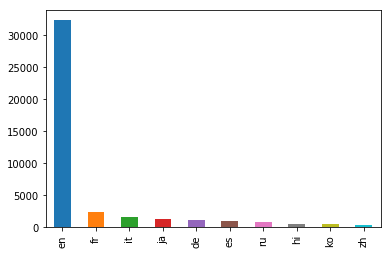

In [ ]:
x.plot.bar()
plt.show()

### Get the titile, id, language, and release_date for  top 10 most popular movies (using Popularity) in the movies_metadata dataset

In [ ]:
movies_metadata[['title', 'id', 'original_language', 
                 'release_date', 'popularity']].sort_values('popularity', ascending=False)[0:10]

,title,id,original_language,release_date,popularity
30700,Minions,211672,en,2015-06-17,547.488281
33356,Wonder Woman,297762,en,2017-05-30,294.337036
42222,Beauty and the Beast,321612,en,2017-03-16,287.253662
43644,Baby Driver,339403,en,2017-06-28,228.032745
24455,Big Hero 6,177572,en,2014-10-24,213.849915
26564,Deadpool,293660,en,2016-02-09,187.860489
26566,Guardians of the Galaxy Vol. 2,283995,en,2017-04-19,185.330994
14551,Avatar,19995,en,2009-12-10,185.070892
24351,John Wick,245891,en,2014-10-22,183.870377
23675,Gone Girl,210577,en,2014-10-01,154.801010


### Get the max, min, mean, median and standard deviation of the following columns from the movies_metadata dataset: budget, revenue, runtime, popularity , vote_average and vote_count

In [69]:
a = movies_metadata[['budget', 'revenue', 'runtime', 'popularity', 
                 'vote_average', 'vote_count']].describe().loc[['max', 'min', 'mean', 'std']]

In [73]:
b = movies_metadata[['budget', 'revenue', 'runtime', 'popularity', 
                 'vote_average', 'vote_count']].median(axis=0)

In [80]:
pd.concat([pd.DataFrame(b).T,a])

,budget,revenue,runtime,popularity,vote_average,vote_count
0,0.0,0.000000e+00,95.000000,1.127410,6.000000,10.000000
max,380000000.0,2.787965e+09,1256.000000,547.488281,10.000000,14075.000000
min,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000
mean,4224280.5,1.120787e+07,93.583711,2.921068,5.617466,109.882836
std,17418974.0,6.432813e+07,38.956167,6.005099,1.925171,491.279576


### Get the count of movies released in each year and plot bar graph of the top 10 years
**Increase the size of the plot to and make it 5x10**

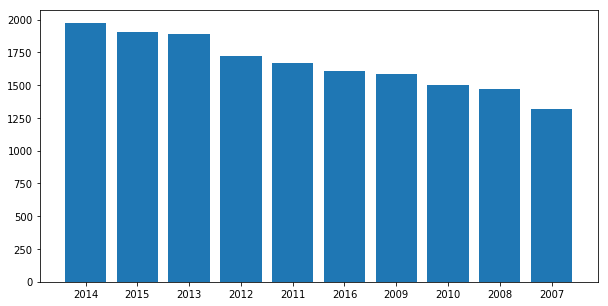

In [ ]:
x = movies_metadata['release_date_year'].apply(str)
y = x.value_counts()[0:10].sort_values(ascending = False)
plt.figure(figsize=(10,5))
plt.bar(y.index, y.values)
plt.show()

###  Give the count of movies which were produced by 'Pixar Animation Studios' and 'Warner Bros.'
Note: There is a full stop (.) in Warner Bros.

In [ ]:
movies_metadata[movies_metadata['production_companies_major'] == 'Pixar Animation Studios']['id'].nunique()

29

In [ ]:
movies_metadata[movies_metadata['production_companies_major'] == 'Warner Bros.']['id'].nunique()

757

###  Give the count of movies where one of the production country is United States

In [ ]:
movies_metadata[movies_metadata['production_countries_all'].str.contains('United States')]['id'].nunique()

21141

### Give the count of movies where one of the genres is 'Animation'

In [ ]:
movies_metadata[movies_metadata['genres_all'].str.contains('Animation')]['id'].nunique()

### List all animation movies which belongs to the Car Collection

In [ ]:
movies_metadata[(movies_metadata['genres_all'].str.contains('Animation')) &  
                (movies_metadata['belongs_to_collection'].str.contains("Cars"))]['original_title']

10979      Cars
17361    Cars 2
43294    Cars 3
Name: original_title, dtype: object

### How much money did the movies from "The Hunger Games Collection" movie collection make together

In [ ]:
movies_metadata[movies_metadata['belongs_to_collection'] == "The Hunger Games Collection"]['revenue'].sum()

2944162634.0

### List the title, release_date_year and popularity score of the top 10 most popular hindi movies in the whole movies_metadata dataset

In [ ]:
movies_metadata.loc[(movies_metadata['original_language'] == "hi"), 
                    ['title', 'release_date_year', 'popularity']].sort_values('popularity', ascending=False)[0:10]

,title,release_date_year,popularity
10309,Dilwale Dulhania Le Jayenge,1995,34.457024
25721,PK,2014,12.587520
12418,Jodhaa Akbar,2008,12.237488
14891,My Name Is Khan,2010,11.264586
22080,Krrish 3,2013,11.114030
22437,The Lunchbox,2013,10.766409
5004,Monsoon Wedding,2001,10.625504
19637,Gangs of Wasseypur,2012,9.777219
41820,Dangal,2016,8.792104
17771,Zindagi Na Milegi Dobara,2011,8.475505


### List names and revenue of the top 10 highest grossing french movies
Use original_language == 'fr'

In [ ]:
movies_metadata.loc[movies_metadata['original_language'] == "fr", ['title', 'revenue']].sort_values('revenue', 
                                                                                                    ascending=False)[0:10]

,title,revenue
18465,The Intouchables,426480871.0
4843,Amélie,173921954.0
14710,Asterix at the Olympic Games,132900000.0
10182,March of the Penguins,127392239.0
9260,Asterix & Obelix: Mission Cleopatra,111127553.0
2581,The Dinner Game,78599508.0
4896,Brotherhood of the Wolf,70752904.0
2936,The Messenger: The Story of Joan of Arc,66976317.0
7878,Taxi 3,65497208.0
9185,Taxi 2,60726164.0


###  List the 10 most popular movies produced by 'Warner Bros.' in the whole movies_metadata dataset
Show id, original_title, revenue, bidget, release_date and popularity

In [ ]:
movies_metadata[movies_metadata['production_companies_major'] == 'Warner Bros.'][['id', 
    'original_title', 'revenue', 'budget', 
    'release_date_dt', 'popularity']].sort_values('popularity', ascending=False)[0:10]

,id,original_title,revenue,budget,release_date_dt,popularity
1184,311,Once Upon a Time in America,0.000000e+00,30000000.0,1984-02-16,32.182850
17437,12445,Harry Potter and the Deathly Hallows: Part 2,1.342000e+09,125000000.0,2011-07-07,24.990738
16128,12444,Harry Potter and the Deathly Hallows: Part 1,9.543059e+08,250000000.0,2010-10-17,23.300362
11927,675,Harry Potter and the Order of the Phoenix,9.382127e+08,150000000.0,2007-06-28,21.364300
13893,767,Harry Potter and the Half-Blood Prince,9.339592e+08,250000000.0,2009-07-07,19.083723
3633,2133,The Perfect Storm,3.257566e+08,120000000.0,2000-03-15,18.911961
21592,49047,Gravity,7.163927e+08,105000000.0,2013-09-27,18.501940
6865,10538,Passenger 57,4.406565e+07,15000000.0,1992-11-05,18.451321
11354,1124,The Prestige,1.096763e+08,40000000.0,2006-10-19,16.945560
2526,1924,Superman,3.002180e+08,55000000.0,1978-12-13,15.460102


### List all John Wick movies from newest to oldest and also show how much it made after deducting the budget
Show id, titile, revenue, release_date, popularity, budget

In [ ]:
temp = movies_metadata[movies_metadata['original_title'].str.contains('John Wick')][['id', 'original_title', 
                                'revenue', 'budget', 'release_date_dt']].sort_values('release_date_dt', ascending=False)
temp['net_earnings'] = temp['revenue'] - temp['budget'] 
temp

,id,original_title,revenue,budget,release_date_dt,net_earnings
42168,324552,John Wick: Chapter 2,171539887.0,40000000.0,2017-02-08,131539887.0
24351,245891,John Wick,88761661.0,20000000.0,2014-10-22,68761661.0


### List all the movies from the Harry Potter Series in increasing order of release dates
Show id, title and release_date

In [ ]:
movies_metadata[movies_metadata['original_title'].str.contains('Harry Potter')][['id', 'original_title', 
                                'release_date_dt']].sort_values('release_date_dt', ascending=True)

,id,original_title,release_date_dt
4766,671,Harry Potter and the Philosopher's Stone,2001-11-16
5678,672,Harry Potter and the Chamber of Secrets,2002-11-13
7725,673,Harry Potter and the Prisoner of Azkaban,2004-05-31
10554,674,Harry Potter and the Goblet of Fire,2005-11-05
11927,675,Harry Potter and the Order of the Phoenix,2007-06-28
13893,767,Harry Potter and the Half-Blood Prince,2009-07-07
16128,12444,Harry Potter and the Deathly Hallows: Part 1,2010-10-17
17437,12445,Harry Potter and the Deathly Hallows: Part 2,2011-07-07


### Get the 10 most popular movies with a vote_average > 8 and vote_count > 300
Show title, vote_average, vote_count, release_date_year and popularity

In [ ]:
movies_metadata[(movies_metadata['vote_average'] > 8) & (movies_metadata['vote_count'] > 300)].sort_values('popularity', 
        ascending=False).loc[:, ['title', 'vote_average', 'vote_count', 'release_date_year', 'popularity']].iloc[0:10]

,title,vote_average,vote_count,release_date_year,popularity
292,Pulp Fiction,8.3,8670.0,1994,140.950241
12481,The Dark Knight,8.3,12269.0,2008,123.167259
23673,Whiplash,8.3,4376.0,2014,64.299988
2843,Fight Club,8.3,9678.0,1999,63.869598
314,The Shawshank Redemption,8.5,8358.0,1994,51.645405
351,Forrest Gump,8.2,8147.0,1994,48.307194
256,Star Wars,8.1,6778.0,1977,42.149696
522,Schindler's List,8.3,4436.0,1993,41.725124
834,The Godfather,8.5,6024.0,1972,41.109264
5481,Spirited Away,8.3,3968.0,2001,41.048866


### Show a list of movies where "Paramount Pictures" is listed as a producer and which has a vote average greater than 7.5 and vote_count > 300
Order the results in decreasing order of vote average

In [ ]:
movies_metadata.loc[(movies_metadata['production_companies_all'].str.contains('Paramount Pictures')) & 
        (movies_metadata['vote_average'] >7.5) &  
        (movies_metadata['vote_count'] >300), ['title', 'vote_average']].sort_values('vote_average', ascending=False)

,title,vote_average
834,The Godfather,8.5
1178,The Godfather: Part II,8.3
1176,Psycho,8.3
895,Sunset Boulevard,8.2
351,Forrest Gump,8.2
877,Rear Window,8.2
1166,Once Upon a Time in the West,8.1
22879,Interstellar,8.1
876,Vertigo,8.0
1901,Metropolis,8.0


### Get the top 5 most common major spoken languages for movies with status other than Released

In [ ]:
movies_metadata[movies_metadata['status'] != "Released"]['spoken_languages_major'].value_counts()[0:5]

English     211
             81
Français     22
Italiano     17
Deutsch      13
Name: spoken_languages_major, dtype: int64

# Aggregation

### Get the maximum revenue produced by a movie in each year between 2000 and 2010 inclusive

In [ ]:
movies_metadata[(movies_metadata['release_date_year'] >= 2000) & 
                (movies_metadata['release_date_year'] <= 2010)].groupby('release_date_year')[['revenue']].max()

,revenue
release_date_year,
2000,5.463881e+08
2001,9.764756e+08
2002,9.262874e+08
2003,1.118889e+09
2004,9.198388e+08
2005,8.959210e+08
2006,1.065660e+09
2007,9.610000e+08
2008,1.004558e+09


### Get the minimum revenue, maximum revenue, average revenue and sum of revenue of movies released in each month in 2014 where the original_language is english

In [ ]:
movies_metadata[(movies_metadata['release_date_year'] == 2014) &
               (movies_metadata['original_language'] == "en")].groupby('release_date_month')['revenue'].agg(['min', 
                                                                'max', 'mean', 'sum'])

,min,max,mean,sum
release_date_month,,,,
1,0.0,2.426890e+08,9.909963e+06,1.119826e+09
2,0.0,4.691607e+08,1.685493e+07,1.297830e+09
3,0.0,7.147666e+08,2.149666e+07,2.601096e+09
4,0.0,7.057174e+08,8.283025e+06,1.308718e+09
5,0.0,7.585398e+08,3.439250e+07,3.232895e+09
6,0.0,1.091405e+09,3.157970e+07,2.968492e+09
7,0.0,7.733286e+08,2.121183e+07,1.824218e+09
8,0.0,4.772000e+08,1.517565e+07,1.775551e+09
9,0.0,3.483199e+08,6.072638e+06,9.716220e+08


### Modify the solution to the above question to show the same metrics for budget too along with revenue

In [ ]:
movies_metadata[(movies_metadata['release_date_year'] == 2014) &
               (movies_metadata['original_language'] == "en")].groupby('release_date_month')[['revenue', 
                                                                'budget']].agg(['min', 'max', 'mean', 'sum'])

revenue                                           budget  \
                       min           max          mean           sum    min   
release_date_month                                                            
1                      0.0  2.426890e+08  9.909963e+06  1.119826e+09    0.0   
2                      0.0  4.691607e+08  1.685493e+07  1.297830e+09    0.0   
3                      0.0  7.147666e+08  2.149666e+07  2.601096e+09    0.0   
4                      0.0  7.057174e+08  8.283025e+06  1.308718e+09    0.0   
5                      0.0  7.585398e+08  3.439250e+07  3.232895e+09    0.0   
6                      0.0  1.091405e+09  3.157970e+07  2.968492e+09    0.0   
7                      0.0  7.733286e+08  2.121183e+07  1.824218e+09    0.0   
8                      0.0  4.772000e+08  1.517565e+07  1.775551e+09    0.0   
9                      0.0  3.483199e+08  6.072638e+06  9.716220e+08    0.0   
10                     0.0  6.521054e+08  1.314444e+07  2.379144e+09    0.0   
11                     0.0  7.521002e+08  2.601870e+07  2.705944e+09    0.0   
12                     0.0  9.560198e+08  4.268863e+07  3.415091e+09    0.0   

                                                            
                            max         mean           sum  
release_date_month                                          
1                   120000000.0   4624026.50  5.225150e+08  
2                   145000000.0   6951948.50  5.353001e+08  
3                   170000000.0   7057603.50  8.539700e+08  
4                   200000000.0   2895430.50  4.574780e+08  
5                   250000000.0  10951597.00  1.029450e+09  
6                   210000000.0   7350799.00  6.909751e+08  
7                   170000000.0   6517628.50  5.605160e+08  
8                   125000000.0   4674769.00  5.469480e+08  
9                    60000000.0   2651538.00  4.242460e+08  
10                  165000000.0   3901187.75  7.061150e+08  
11                  165000000.0   5985816.00  6.225249e+08  
12                  250000000.0  14105463.00  1.128437e+09

### Get the count of the movies in each collection where Pixar Animation Studios is a producer  along with the sum of revenue and budget each collection made

In [ ]:
x = movies_metadata[movies_metadata['production_companies_all'].str.contains('Pixar Animation Studios')]
x.groupby(['belongs_to_collection'])[['id', 'budget', 'revenue']].agg(
    {'id': 'nunique', 'budget':'sum', 'revenue': 'sum'})

,id,budget,revenue
belongs_to_collection,,,
,40,1.160000e+09,3.971913e+09
Cars Collection,3,4.950000e+08,1.372006e+09
Finding Nemo Collection,2,2.940000e+08,1.968906e+09
"Monsters, Inc. Collection",3,3.150000e+08,1.306376e+09
The Incredibles Collection,1,9.200000e+07,6.314421e+08
Toy Story Collection,3,3.200000e+08,1.937891e+09


### Get the maximum budget and maximum revenue in each month between 1990 and 1992 along with the movie count of movies released

In [ ]:
x = movies_metadata[(movies_metadata['release_date_year'] >= 1990) & (movies_metadata['release_date_year'] <= 1992)]
x.groupby(['release_date_year', 'release_date_month']).agg({'budget': 'max', 'revenue': 'max', 'id':'nunique'})

budget      revenue  id
release_date_year release_date_month                              
1990              1                    11000000.0   48572000.0  62
                  2                    23000000.0   47410000.0  39
                  3                    30000000.0  463000000.0  34
                  4                    11000000.0   22424195.0  26
                  5                    40000000.0  244527583.0  33
                  6                    65000000.0  261317921.0  22
                  7                    70000000.0  505000000.0  21
                  8                    31000000.0   61489265.0  38
                  9                    25000000.0   46836394.0  49
                  10                   42000000.0  119946358.0  34
                  11                   37931000.0  476684675.0  34
                  12                   54000000.0  201957688.0  34
1991              1                    35000000.0   34793160.0  60
                  2                    40000000.0  272742922.0  25
                  3                    38000000.0   78000000.0  34
                  4                    35000000.0   39673161.0  21
                  5                    75000000.0  152368585.0  45
                  6                    48000000.0  390493908.0  20
                  7                   100000000.0  520000000.0  30
                  8                    23000000.0   38016380.0  31
                  9                    34000000.0   41895491.0  46
                  10                   28000000.0   22773535.0  41
                  11                   48000000.0  377350553.0  38
                  12                   70000000.0  300854823.0  35
1992              1                    11700000.0   88036683.0  68
                  2                    40000000.0  121697323.0  25
                  3                    49000000.0  352927224.0  33
                  4                    27000000.0  147214049.0  38
                  5                    60000000.0  321731527.0  36
                  6                    80000000.0  280000000.0  18
                  7                    55000000.0  149022650.0  27
                  8                    40000000.0  159157447.0  33
                  9                    43000000.0  105232691.0  66
                  10                   47000000.0  156563139.0  43
                  11                   40000000.0  504050219.0  22
                  12                   40000000.0  243240178.0  44

Get the top 3 movies by revenue in each year starting from 2000

###  Get the avergae revenue generated by Paramount Pictures as a major producer in each year starting from 2005

In [ ]:
movies_metadata[(movies_metadata['production_companies_major'] == "Paramount Pictures") &
               (movies_metadata['release_date_year'] >= 2005)].groupby('release_date_year')['revenue'].mean()

release_date_year
2005    1.116600e+08
2006    1.138680e+08
2007    1.611102e+08
2008    1.312311e+08
2009    1.905850e+08
2010    1.917189e+08
2011    3.214956e+08
2012    2.588801e+08
2013    2.999458e+08
2014    3.294865e+08
2015    1.948181e+08
2016    1.151716e+08
2017    2.303049e+08
Name: revenue, dtype: float64

### How many movies has Keanu Reeves, Ryan Renolds and Seth Rogen been the lead actor in ?
Use the credits dataset

In [ ]:
credits[(credits['lead_cast'] == "Keanu Reeves") | (credits['lead_cast'] == "Ryan Reynolds") | 
(credits['lead_cast'] == "Seth Rogen")].groupby('lead_cast')['id'].nunique()

lead_cast
Keanu Reeves     34
Ryan Reynolds    16
Seth Rogen       12
Name: id, dtype: int64

### Get the count of movies "Sandra Bullock", "Kate Beckinsale" and "Bette Davis" have acted as the lead in and sort them in decreasing number of movies
Use the credits dataset

In [ ]:
credits[(credits['lead_cast'] == "Sandra Bullock") | (credits['lead_cast'] == "Kate Beckinsale") | 
(credits['lead_cast'] == "Bette Davis")].groupby('lead_cast')['id'].nunique().sort_values(ascending=False)

lead_cast
Bette Davis        45
Sandra Bullock     25
Kate Beckinsale    18
Name: id, dtype: int64

### Get the top 10 actors with the highest count of lead acting roles 
Use the credits dataset and ignore empty string

In [ ]:
credits.groupby('lead_cast')['id'].nunique().sort_values(ascending=False)[1:11]

lead_cast
John Wayne          92
Jackie Chan         71
Nicolas Cage        55
Robert De Niro      53
Michael Caine       50
Gérard Depardieu    50
Burt Lancaster      47
Barbara Stanwyck    45
Bette Davis         45
Paul Newman         45
Name: id, dtype: int64

### Get the top 10 user ids who has rated the highest number of movies
Use ratings dataset

In [ ]:
ratings.groupby('userId')['movieId'].nunique().sort_values(ascending=False)[0:10]

userId
45811     18276
8659       9279
270123     7638
179792     7515
228291     7410
243443     6320
98415      6094
229879     6024
98787      5814
172224     5701
Name: movieId, dtype: int64

### Get the top 3 movies (original_title and revenue) by revenue in each year between 2000 and 2003 (Optional)
**Hint: Use apply, lambda, sorting and Groupby twice**

In [ ]:
x = movies_metadata[(movies_metadata['release_date_year'] >= 2000) & 
                (movies_metadata['release_date_year'] <= 2003)].groupby('release_date_year')

x2 = x.apply(lambda x: x.sort_values('revenue', ascending=False))
x2.groupby('release_date_year').head(3)[['original_title', 'revenue']]

original_title  \
release_date_year                                                           
2000              3501                             Mission: Impossible II   
                  3456                                          Gladiator   
                  3897                                          Cast Away   
2001              4766           Harry Potter and the Philosopher's Stone   
                  4863  The Lord of the Rings: The Fellowship of the Ring   
                  4756                                     Monsters, Inc.   
2002              5814              The Lord of the Rings: The Two Towers   
                  5678            Harry Potter and the Chamber of Secrets   
                  5215                                         Spider-Man   
2003              7000      The Lord of the Rings: The Return of the King   
                  6232                                       Finding Nemo   
                  6221                                The Matrix Reloaded   

                             revenue  
release_date_year                     
2000              3501  5.463881e+08  
                  3456  4.576404e+08  
                  3897  4.296321e+08  
2001              4766  9.764756e+08  
                  4863  8.713684e+08  
                  4756  5.628163e+08  
2002              5814  9.262874e+08  
                  5678  8.766885e+08  
                  5215  8.217086e+08  
2003              7000  1.118889e+09  
                  6232  9.403355e+08  
                  6221  7.385997e+08

### Get the most popular hindi ('hi') movie each year starting from 2005 (Optional)
**Show release_date_year, title & popularity score; Hint: Get the ids and subset out from original dataframe**

In [ ]:
ids = movies_metadata[(movies_metadata['original_language']=="hi") &
                (movies_metadata['release_date_year'] >= 2005)].groupby('release_date_year')['popularity'].idxmax().values
movies_metadata.iloc[ids][['release_date_year', 'title', 'popularity']]

,release_date_year,title,popularity
10300,2005,Black,2.854219
20688,2006,Don : The Chase Begins Again,7.633636
12314,2007,Taare Zameen Par,6.093304
12418,2008,Jodhaa Akbar,12.237488
14732,2009,3 Idiots,7.675621
14891,2010,My Name Is Khan,11.264586
17771,2011,Zindagi Na Milegi Dobara,8.475505
19637,2012,Gangs of Wasseypur,9.777219
22080,2013,Krrish 3,11.114030
25721,2014,PK,12.587520


# Joining

<a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html"> Pandas Merging/Joining</a>

### Join the "movies_metadata" dataset with the credits dataset and get only the "lead_cast_cleaned" column from the "credits" dataset. Show the first 3 rows of the result. What kind of a join will you perform and why?
<a href="https://stackoverflow.com/questions/6294778/mysql-quick-breakdown-of-the-types-of-joins/6294854#6294854"> Quick Look On the Different Types of Joins</a>

In [ ]:
movies_metadata_credits = pd.merge(movies_metadata, credits, on='id', how="left")
movies_metadata_credits.head(3)

,id,imdb_id,adult,budget,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genres_all,genres_major,production_companies_major,production_companies_all,production_countries_major,production_countries_all,spoken_languages_major,spoken_languages_all,belongs_to_collection,release_date_dt,release_date_year,release_date_month,lead_cast
0,862,tt0114709,False,30000000.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,,Toy Story,7.7,5415.0,Animation; Comedy; Family,Animation,Pixar Animation Studios,Pixar Animation Studios,United States of America,United States of America,English,English,Toy Story Collection,1995-10-30,1995,10,Tom Hanks
1,8844,tt0113497,False,65000000.0,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,Adventure; Fantasy; Family,Adventure,TriStar Pictures,TriStar Pictures; Teitler Film; Interscope Com...,United States of America,United States of America,English,English; Français,,1995-12-15,1995,12,Robin Williams
2,15602,tt0113228,False,0.0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Romance; Comedy,Romance,Warner Bros.,Warner Bros.; Lancaster Gate,United States of America,United States of America,English,English,Grumpy Old Men Collection,1995-12-22,1995,12,Walter Matthau


### What are the number of rows in the resultant dataframe and the number of rows in the left dataframe? What problems will we face if we join the two dataframes directly without any prior treatment?

Credits table contains duplicate entries for a few ids which will lead to duplicates in the new resultant dataframe. 43 Duplicates need to be removed

In [ ]:
(credits['id'].value_counts() > 1).sum()

43

In [ ]:
credits[credits['id'] == 141971] # example

,id,lead_cast
13261,141971,Petteri Summanen
13375,141971,Petteri Summanen
16764,141971,Petteri Summanen


### Join credits and movies_metadata again after the treatment.

In [ ]:
credits_treated = credits.groupby('id')['lead_cast'].first().reset_index()
credits_treated[credits_treated['id'] == 141971] #example

,id,lead_cast
33178,141971,Petteri Summanen


In [ ]:
movies_metadata_credits = pd.merge(movies_metadata, credits_treated, on='id', how="left")
movies_metadata_credits.head(3)

,id,imdb_id,adult,budget,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genres_all,genres_major,production_companies_major,production_companies_all,production_countries_major,production_countries_all,spoken_languages_major,spoken_languages_all,belongs_to_collection,release_date_dt,release_date_year,release_date_month,lead_cast
0,862,tt0114709,False,30000000.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,,Toy Story,7.7,5415.0,Animation; Comedy; Family,Animation,Pixar Animation Studios,Pixar Animation Studios,United States of America,United States of America,English,English,Toy Story Collection,1995-10-30,1995,10,Tom Hanks
1,8844,tt0113497,False,65000000.0,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,Adventure; Fantasy; Family,Adventure,TriStar Pictures,TriStar Pictures; Teitler Film; Interscope Com...,United States of America,United States of America,English,English; Français,,1995-12-15,1995,12,Robin Williams
2,15602,tt0113228,False,0.0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Romance; Comedy,Romance,Warner Bros.,Warner Bros.; Lancaster Gate,United States of America,United States of America,English,English,Grumpy Old Men Collection,1995-12-22,1995,12,Walter Matthau


### There should be 4 NANs in the lead_cast column  of the resultant dataframe after performing the above join. Why are the nulls present ? Show all columns of these 4 rows containing nulls

In [ ]:
movies_metadata_credits[movies_metadata_credits['lead_cast'].isnull()]

,id,imdb_id,adult,budget,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genres_all,genres_major,production_companies_major,production_companies_all,production_countries_major,production_countries_all,spoken_languages_major,spoken_languages_all,belongs_to_collection,release_date_dt,release_date_year,release_date_month,lead_cast
19730,0,0,False,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,0.000000,1,0.0,0.0,,,,0.0,0.0,Carousel Productions; Vision View Entertainmen...,Carousel Productions,,,,,,,,1000-01-01,1000,1,NaN
29503,0,0,False,0.0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,0.000000,12,0.0,0.0,,,,0.0,0.0,Aniplex; GoHands; BROSTA TV; Mardock Scramble ...,Aniplex,,,,,,,,1000-01-01,1000,1,NaN
35587,0,0,False,0.0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,0.000000,22,0.0,0.0,,,,0.0,0.0,Odyssey Media; Pulser Productions; Rogue State...,Odyssey Media,,,,,,,,1000-01-01,1000,1,NaN
42883,401840,tt3291632,False,0.0,es,School's out,Two high school kids mentored by a nightclub o...,0.207775,2017-05-30,0.0,0.0,Released,,School's out,0.0,0.0,,,,,,,,,,2017-05-30,2017,5,NaN


### Get the lead actors and original_title of the movie from the top 10 most popular hindi movies with release date greater than 2005

In [ ]:
movies_metadata_credits[(movies_metadata_credits['release_date_year'] > 2005) & 
                       (movies_metadata_credits['original_language'] == 'hi')].sort_values('popularity', 
                                                            ascending=False)[['original_title', 'lead_cast']][0:10]

,original_title,lead_cast
25721,PK,Aamir Khan
12418,Jodhaa Akbar,Hrithik Roshan
14891,My Name Is Khan,Shah Rukh Khan
22080,कृष ३,Hrithik Roshan
22437,Dabba,Irrfan Khan
19637,Gangs of वासेपुर,Manoj Bajpayee
41820,दंगल,Aamir Khan
17771,Zindagi Na Milegi Dobara,Hrithik Roshan
33005,Cocktail,Deepika Padukone
14732,3 Idiots,Aamir Khan


### Get the lead_cast and original_title of the top 5 highest grossing movies ever

In [ ]:
movies_metadata_credits.sort_values('revenue', ascending=False)[['original_title', 'lead_cast']][0:10]

,original_title,lead_cast
14551,Avatar,Sam Worthington
26555,Star Wars: The Force Awakens,Daisy Ridley
1639,Titanic,Kate Winslet
17818,The Avengers,Robert Downey Jr.
25084,Jurassic World,Chris Pratt
28830,Furious 7,Vin Diesel
26558,Avengers: Age of Ultron,Robert Downey Jr.
17437,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe
22110,Frozen,Kristen Bell
42222,Beauty and the Beast,Emma Watson


### Get the lead_cast, release_date_year, original_title and revenue of the highest grossing movies each year between 2005 and 2010 (Optional)

In [ ]:
ids = movies_metadata_credits[(movies_metadata_credits['release_date_year'] >= 2005) 
        & (movies_metadata_credits['release_date_year'] <= 2010) ].groupby('release_date_year')['revenue'].idxmax()
movies_metadata_credits.loc[ids, ['release_date_year', 'lead_cast', 'original_title', 'revenue']]

,release_date_year,lead_cast,original_title,revenue
10554,2005,Daniel Radcliffe,Harry Potter and the Goblet of Fire,8.959210e+08
11008,2006,Johnny Depp,Pirates of the Caribbean: Dead Man's Chest,1.065660e+09
11827,2007,Johnny Depp,Pirates of the Caribbean: At World's End,9.610000e+08
12481,2008,Christian Bale,The Dark Knight,1.004558e+09
14551,2009,Sam Worthington,Avatar,2.787965e+09
15348,2010,Tom Hanks,Toy Story 3,1.066970e+09


### List some problems that will be faced while directly joining the ratings dataset with the movies_metadata dataset. 

Ratings dataset has multiple rows for each movie which pertains to the rating provided by a user for that particular movie.
Directly joining it will create duplicated rows to be created

### How will you address the above problems?

Ratings dataset needs to be first aggregated to "movieId" level and the average of ratings provided by each user should be taken before joining it to the movies_metadata dataset

### Address the above problems and join "movies_metadata" with the "ratings" dataset keeping "movies_metadata" as the left table. Also add a count of distinct users who gave ratings for a specific movie (rename it as "number_of_users_who_rated")

In [ ]:
ratings_average = ratings.groupby('movieId').agg({'rating':'mean', 'userId':'nunique'}).reset_index()

In [ ]:
ratings_average.columns = ['movieId', 'rating', 'number_of_users_who_rated']
ratings_average.head()

,movieId,rating,number_of_users_who_rated
0,1,3.888157,66008
1,2,3.236953,26060
2,3,3.175550,15497
3,4,2.875713,2981
4,5,3.079565,15258


In [ ]:
movies_metadata_ratings = pd.merge(movies_metadata, ratings_average, left_on='id', right_on='movieId', how="left")

In [ ]:
movies_metadata_ratings.shape

(45466, 31)

In [ ]:
movies_metadata.shape

(45466, 28)

### Join the treated credits dataset too to the dataframe created in the above question

In [ ]:
movies_metadata_ratings_credits = pd.merge(movies_metadata_ratings, credits_treated, how="left", on="id")

In [ ]:
movies_metadata_ratings_credits.shape

(45466, 32)

### How many movies don't have a rating ?

In [ ]:
movies_metadata_ratings_credits[movies_metadata_ratings_credits['rating'].isnull()].id.nunique()

37869

### Fill the NaNs in the "rating" and "movieId", "number_od_users_who_rated" column in the new joined dataset with 0s. Also fill the NaNs in the "lead_cast" column with empty string ''

In [ ]:
movies_metadata_ratings_credits['rating'].fillna(0, inplace=True)
movies_metadata_ratings_credits['movieId'].fillna(0, inplace=True)
movies_metadata_ratings_credits['lead_cast'].fillna('', inplace=True)
movies_metadata_ratings_credits['number_of_users_who_rated'].fillna(0, inplace=True)

In [ ]:
movies_metadata_ratings_credits.isnull().sum()

id                            0
imdb_id                       0
adult                         0
budget                        0
original_language             0
original_title                0
overview                      0
popularity                    0
release_date                  0
revenue                       0
runtime                       0
status                        0
tagline                       0
title                         0
vote_average                  0
vote_count                    0
genres_all                    0
genres_major                  0
production_companies_major    0
production_companies_all      0
production_countries_major    0
production_countries_all      0
spoken_languages_major        0
spoken_languages_all          0
belongs_to_collection         0
release_date_dt               0
release_date_year             0
release_date_month            0
movieId                       0
rating                        0
number_of_users_who_rated     0
lead_cas

### Get the movie title and lead cast of the highest rated english and french movies in the years 2008. Consider only the movies where "number_of_users_who_rated" > 1000

In [ ]:
movies_metadata_ratings_credits[(movies_metadata_ratings_credits['release_date_year'] == 2008) &
        (movies_metadata_ratings_credits['original_language'] == 'en') &
    (movies_metadata_ratings_credits['number_of_users_who_rated'] > 1000) ].sort_values('rating', 
                                                        ascending=False)[0:1][['original_title', 'lead_cast']]

,original_title,lead_cast
12543,Street Kings,Keanu Reeves


In [ ]:
movies_metadata_ratings_credits[(movies_metadata_ratings_credits['release_date_year'] == 2008) &
        (movies_metadata_ratings_credits['original_language'] == 'fr') &
    (movies_metadata_ratings_credits['number_of_users_who_rated'] > 1000)].sort_values('rating', 
                                                        ascending=False)[0:1][['original_title', 'lead_cast']]

,original_title,lead_cast
14710,Astérix aux Jeux Olympiques,Clovis Cornillac


### Show the top 20 actors who have the highest average rating for all their movies. Consider only those actors who have acted as leads in 20 or more movies

In [ ]:
x = movies_metadata_ratings_credits.groupby('lead_cast').agg({'id':'nunique', 'rating':'mean'}).reset_index()
x[x['id'] > 20].sort_values('rating', ascending=False)[0:20]

,lead_cast,id,rating
4721,George Clooney,24,2.004834
5770,Jack Nicholson,27,1.692849
1897,Bruce Willis,43,1.618571
6889,Johnny Depp,39,1.615327
9490,Matt Dillon,23,1.601967
9658,Mel Gibson,32,1.540708
10523,Nicolas Cage,55,1.488924
13739,Til Schweiger,21,1.475430
2534,Christopher Lambert,24,1.464314
13875,Tom Hanks,41,1.418876


### Get the rating, original_title and lead_cast of the highest rates english movies in each year released between 2000 and 2005. Consider only the movies where "number_of_users_who_rated" > 1000 (Optional)

In [ ]:
g = movies_metadata_ratings_credits[(movies_metadata_ratings_credits['release_date_year'] >= 2000) &
                    (movies_metadata_ratings_credits['release_date_year'] <= 2005) &
        (movies_metadata_ratings_credits['original_language'] == 'en') &
            (movies_metadata_ratings_credits['number_of_users_who_rated'] > 1000)].groupby('release_date_year')

movies_metadata_ratings_credits.iloc[g['rating'].idxmax()][['release_date_year', 
                                                            'original_title', 'lead_cast', 'rating']]

,release_date_year,original_title,lead_cast,rating
4020,2000,The Million Dollar Hotel,Mel Gibson,4.429015
43836,2001,Totally Blonde,Krista Allen,4.033480
5325,2002,Men in Black II,Tommy Lee Jones,4.105347
6141,2003,The Good Thief,Nick Nolte,4.187873
7938,2004,The Bourne Supremacy,Matt Damon,3.978199
10089,2005,Madagascar,Ben Stiller,4.016309


# Plotting techniques
**<a href="https://pythonspot.com/matplotlib/">Reference for Plotting with Matplotlib</a> <br>**
**Keep all plot sizes at 5x10 unless specified otherwise**

### List & Plot bar graph of 10 biggest production companies by Revenue
Use 'production_companies_major' variable

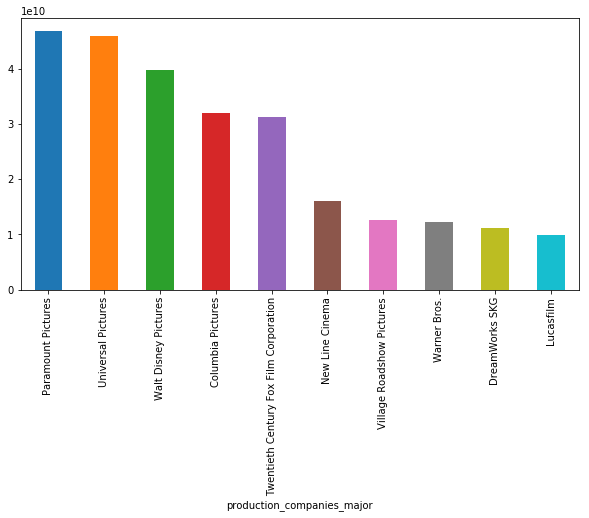

In [ ]:
x = movies_metadata.groupby('production_companies_major')['revenue'].sum().sort_values(ascending=False)[0:10]
plt.figure(figsize=(10, 5))
x.plot(kind='bar')
plt.show()

### Plot pie chart for the percentage of major spoken language of the movies  
**Make figure size 6 x 6** <br>
**Mark Languages other than 'English', 'Español', 'Italiano' as 'Others'** <br>
**Add labels for the pies to the chart**

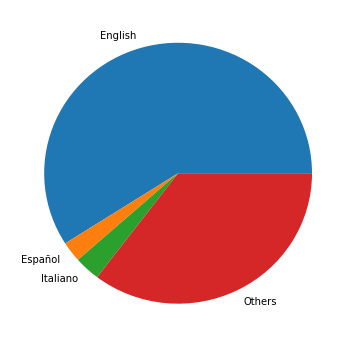

In [ ]:
plt.figure(figsize=(6,6))

x = movies_metadata[['id', 'spoken_languages_major']]
x['spoken_languages_major'] = x['spoken_languages_major'].apply(lambda x: x if x in ('English', 
                                                                                     'Español', 'Italiano') else 'Others')
y = x.groupby('spoken_languages_major')['id'].nunique()
plt.pie(y.values, 
        labels=y.index)
plt.show()

### Plot pie chart for the number of movies in each genre using major genre column 
**Make chart size as 10x10**<br>
**Add plot titles**

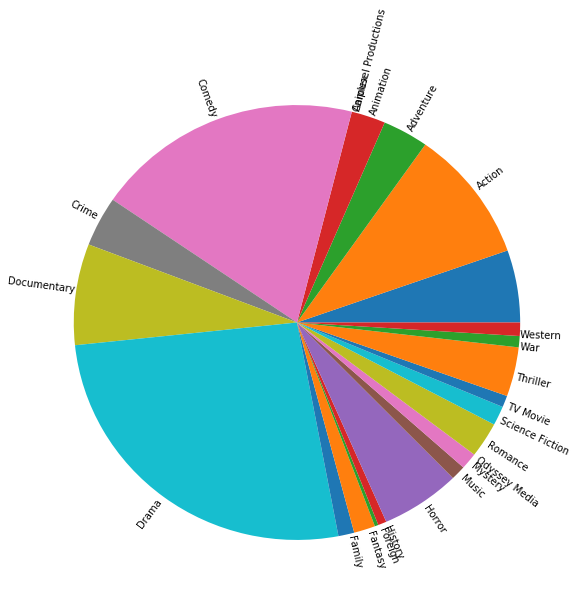

In [ ]:
plt.figure(figsize=(10,10))

x = movies_metadata.groupby('genres_major')['id'].nunique()
plt.pie(x, labels=x.index, rotatelabels=True, labeldistance=1)
plt.show()

### Plot bar chart for the number of movies produced in each country for the top 10 major countries
**Add title and axis labels to the plot (set fontsize to 14). Exclude nulls and empty strings and use production_countries_major**

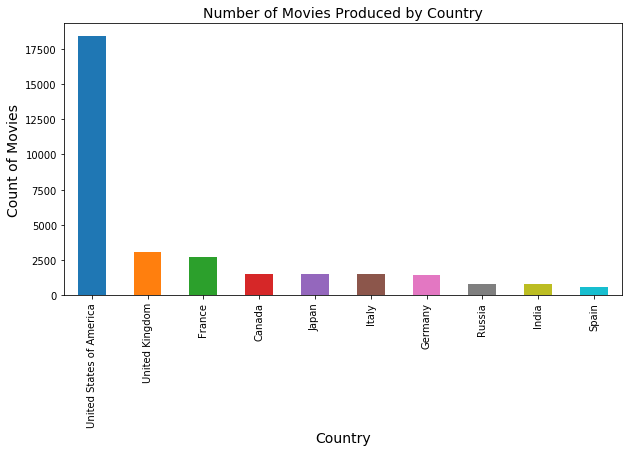

In [ ]:
x = movies_metadata[movies_metadata['production_countries_major']!=''].groupby(
    'production_countries_major')['id'].nunique().sort_values(ascending=False)[0:10]
plt.figure(figsize=(10,5))
x.plot(kind='bar')
plt.title('Number of Movies Produced by Country', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count of Movies', fontsize=14)
plt.show()

### Add annotation i.e. the values for each bar in the above chart (Optional)

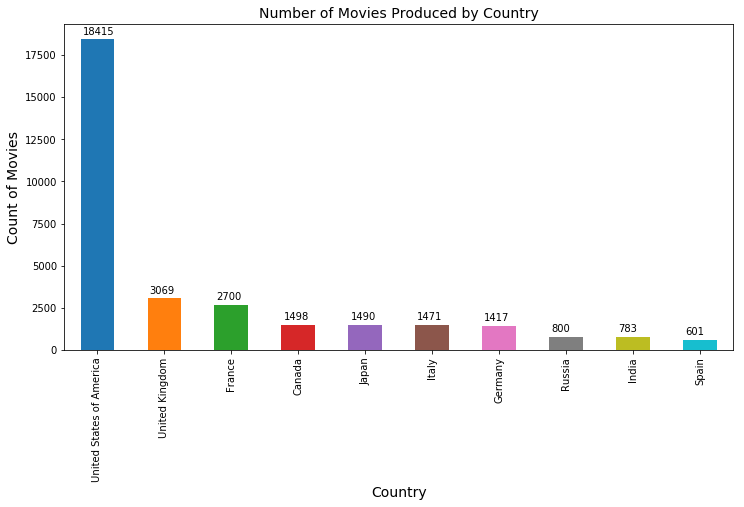

In [ ]:
x = movies_metadata[movies_metadata['production_countries_major']!=''].groupby(
    'production_countries_major')['id'].nunique().sort_values(ascending=False)[0:10]
plt.figure(figsize=(12,6))
ax = x.plot(kind='bar')
plt.title('Number of Movies Produced by Country', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count of Movies', fontsize=14)
i = 0
for val in x.values:
    ax.text(s=val, y=val+300, x =i-0.22)
    i+=1
plt.show()

### Plot two histograms showing distribution of rating and vote_average. Use Subplot.
**Use 5 bins for rating and 10 bins for vote_average**

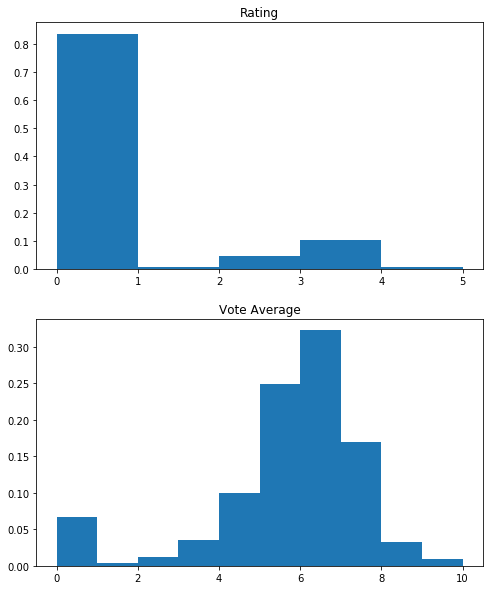

In [ ]:
plt.figure(figsize=(8, 10))

plt.subplot(2,1,1)
plt.title('Rating')
plt.hist(movies_metadata_ratings_credits['rating'], bins=5, density=True)

plt.subplot(2,1,2)
plt.title('Vote Average')
plt.hist(movies_metadata_ratings_credits['vote_average'], bins=10, density=True)

plt.show()

### Plot a scatter plot between budget and revenue 
**Add axis labels and titles**

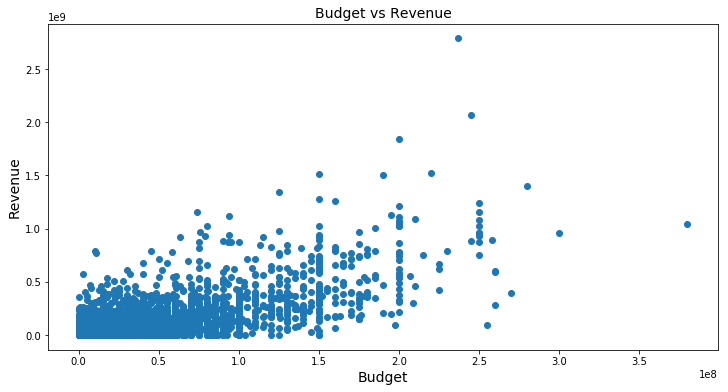

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(movies_metadata['budget'], movies_metadata['revenue'])
plt.title('Budget vs Revenue', fontsize=14)
plt.xlabel('Budget', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.show()

### Remove outliers from both budget and revenue and plot again 
**Use mean + (2 * sigma) and mean - (2 * sigma) for outlier thresholding**

**<a href="https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/">Outliers Based on Mean and SD</a>**

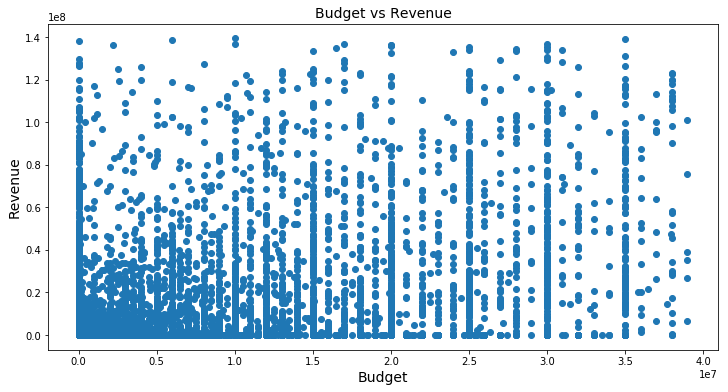

In [ ]:
x = movies_metadata['budget']
y = movies_metadata['revenue']

x_pos_thresh = np.mean(x) + (2* np.std(x))
x_neg_thresh = np.mean(x) - (2* np.std(x))

y_pos_thresh = np.mean(y) + (2* np.std(y))
y_neg_thresh = np.mean(y) - (2* np.std(y))

temp1 = movies_metadata[['budget', 'revenue']][(movies_metadata['budget'] < x_pos_thresh) & 
                                       (movies_metadata['budget'] > x_neg_thresh) &
                                       (movies_metadata['revenue'] < y_pos_thresh) & 
                                       (movies_metadata['revenue'] > y_neg_thresh)]

plt.figure(figsize=(12, 6))
plt.scatter(temp1['budget'], temp1['revenue'])
plt.title('Budget vs Revenue', fontsize=14)
plt.xlabel('Budget', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.show()

### Add trend line to the above plot and calculate correlation (Optional)
**Hint: Use Seaborn**

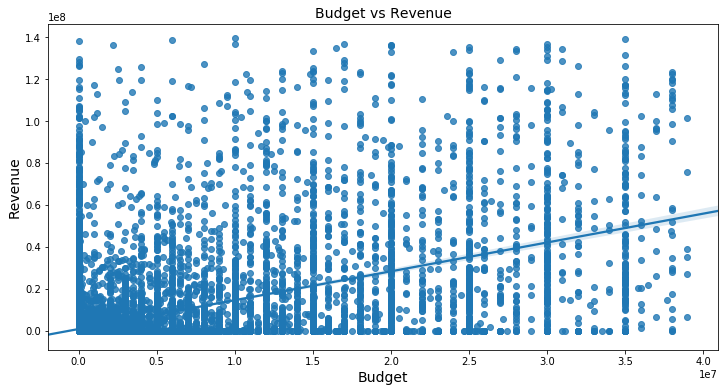

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(temp1['budget'], temp1['revenue'])
plt.title('Budget vs Revenue', fontsize=14)
plt.xlabel('Budget', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.show()

In [ ]:
temp1.corr()

,budget,revenue
budget,1.000000,0.558717
revenue,0.558717,1.000000


### Plot the Mean Revenue vs Date and Mean Budget vs Date using Subplots (Subset only for 2012)
**Add titles for both plots. Make plot size as 16*10**

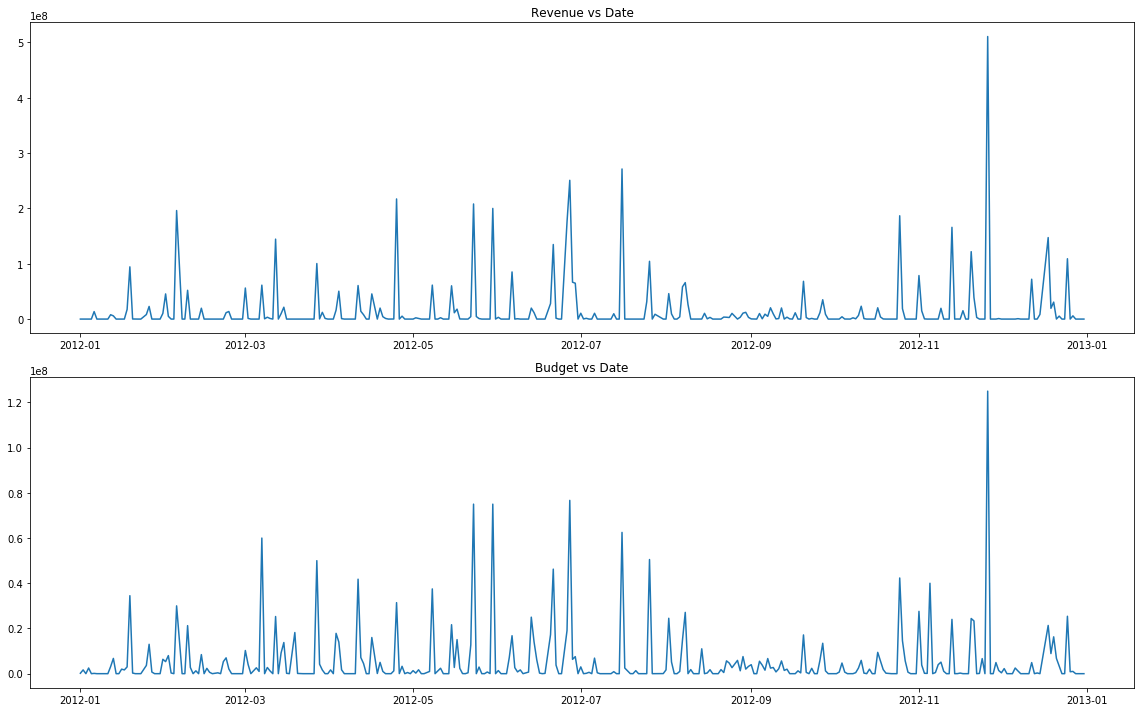

In [ ]:
plt.figure(figsize=(16, 10))
plt.subplot(2,1,1)
plt.title('Revenue vs Date')
r = movies_metadata[(movies_metadata['release_date_year'] == 2012)][['release_date_dt', 
                                'revenue']].groupby('release_date_dt')['revenue'].mean()
plt.plot(r)


plt.subplot(2,1,2)
plt.title('Budget vs Date')
b = movies_metadata[(movies_metadata['release_date_year'] == 2012)][['release_date_dt', 
                                'budget']].groupby('release_date_dt')['budget'].mean()
plt.plot(b)


plt.tight_layout()
plt.show()

### Create the same plot as above without subplots and overlap in the same plot and add legends
**Make budget color as green and revenue color as red. Also make the revenue line style as dashed. Make plot sizes as 16*10**

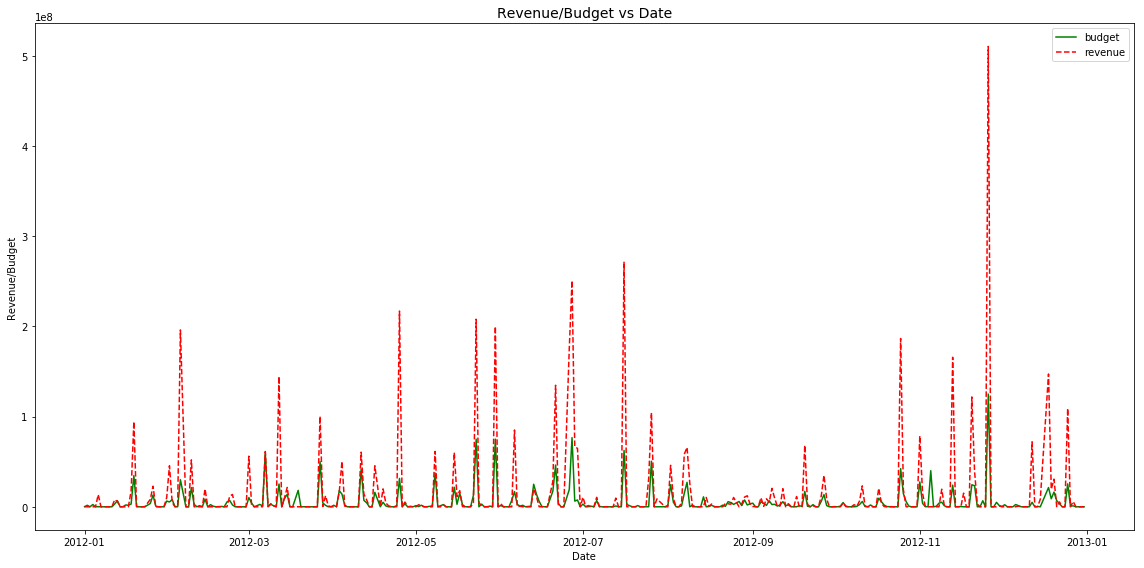

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Revenue/Budget vs Date', fontsize=14)
r = movies_metadata[(movies_metadata['release_date_year'] == 2012)][['release_date_dt', 
                                'revenue']].groupby('release_date_dt')['revenue'].mean()
b = movies_metadata[(movies_metadata['release_date_year'] == 2012)][['release_date_dt', 
                                'budget']].groupby('release_date_dt')['budget'].mean()

plt.plot(b, color="green")
plt.plot(r, color="red", linestyle="--")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Revenue/Budget')
plt.tight_layout()
plt.show()

### Create Box-plot for revenue, budget, popularity, rating and vote_average
**Make 4 subplots. Keep revenue and budget box plots in the same subplot and the rest in different subplots**<br>
**Add subtitles for each subplot**

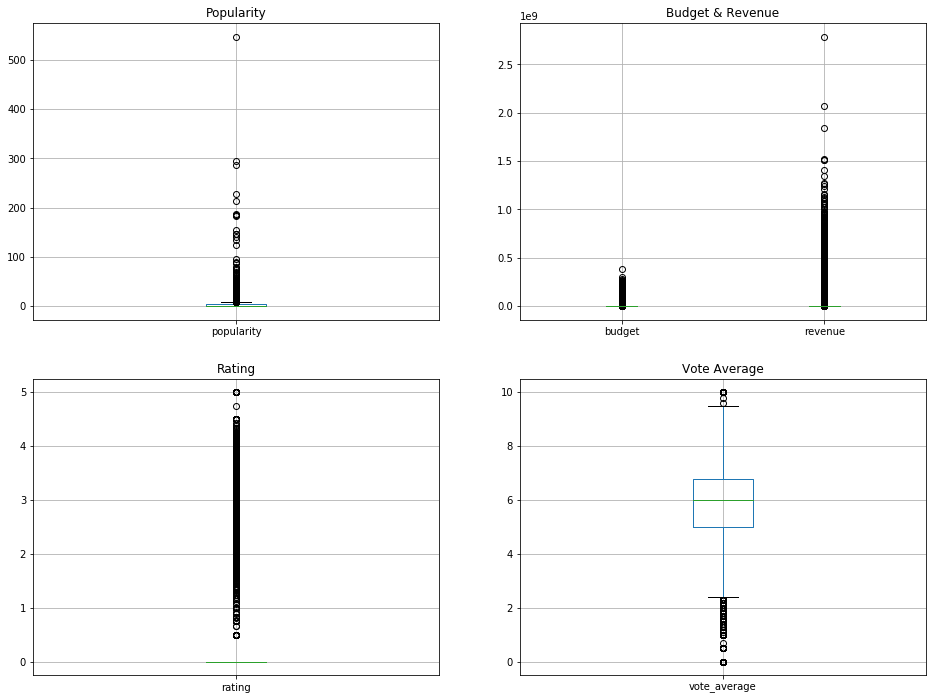

In [ ]:
plt.figure(figsize=(16, 12))

plt.subplot(2,2,1)
plt.title('Popularity')
movies_metadata_ratings_credits[['popularity']].boxplot()


plt.subplot(2,2,2)
plt.title('Budget & Revenue')
movies_metadata_ratings_credits[['budget', 'revenue']].boxplot()

plt.subplot(2,2,3)
plt.title('Rating')
movies_metadata_ratings_credits[['rating']].boxplot()

plt.subplot(2,2,4)
plt.title('Vote Average')
movies_metadata_ratings_credits[['vote_average']].boxplot()

plt.show()

###  Remove or treat outliers and create the Box-plots created above again  (Optional)
**Use Interquartile Range to remove outliers**<br>
**<a href="https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule">IQR</a>**

### Create Correlation plot for all the numeric variables in movies_metadata
**Hint: Use Seaborn Heatmap and Make plot size 14x10**

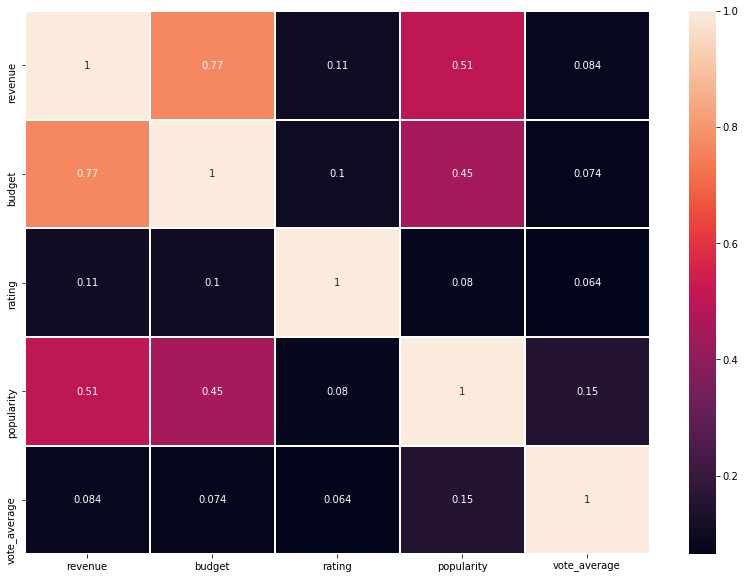

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(movies_metadata_ratings_credits[['revenue', 'budget', 'rating', 'popularity', 'vote_average']].corr(), 
            annot=True, linewidths=1)
plt.show()